# Sklearn Multilayer Perceptron (MLP)

Trying the MLP program mentioned in the "Hands-on Machine Learning with Scikit-Learn, Keras & tensorflow".



## Regression

We will be using the diabetes dataset from the sklearn dataset library.

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## dataset
from sklearn.datasets import load_diabetes

## To split into test and train dataset
from sklearn.model_selection import train_test_split

## To create the pipeline for data transformation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

## For the MLP
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Loading the dataset
diabetes = load_diabetes()

In [ ]:
# Some info
print(f"Number of records: {len(diabetes.data)}")
print(f"Number of target records: {len(diabetes.target)}")
print(f"Number of features: {len(diabetes.data[0])}")
print("The features are :")
print(diabetes.feature_names)

Number of records: 442
Number of target records: 442
Number of features: 10
The features are :
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Details from Sklearn:
1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level

### Splitting the data for train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.25)

print(f"Number of training data: ({len(X_train)},{len(y_train)})")
print(f"Number of testing data: ({len(X_test)},{len(y_test)})")

Number of training data: (331,331)
Number of testing data: (111,111)


### Visualize the data

In [ ]:
# How does data look?
X_train[0], y_train[0]

(array([ 0.07076875, -0.04464164,  0.06924089,  0.0379505 ,  0.02182224,
         0.00150446, -0.03603757,  0.039106  ,  0.0776366 ,  0.10661708]),
 220.0)

In [ ]:
#create a data Frame
temp_data = pd.DataFrame(X_train, columns = diabetes.feature_names)

In [ ]:
temp_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.070769,-0.044642,0.069241,0.037950,0.021822,0.001504,-0.036038,0.039106,0.077637,0.106617
1,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002004,0.077622
2,0.041708,-0.044642,-0.032073,-0.061892,0.079612,0.050982,0.056003,-0.009972,0.045067,-0.059067
3,0.019913,-0.044642,-0.057941,-0.057313,-0.001569,-0.012587,0.074412,-0.039493,-0.061176,-0.075636
4,0.081666,0.050680,0.006728,-0.004534,0.109883,0.117056,-0.032356,0.091875,0.054720,0.007207
...,...,...,...,...,...,...,...,...,...,...
326,-0.023677,-0.044642,-0.069797,-0.064199,-0.059359,-0.050478,0.019187,-0.039493,-0.089133,-0.050783
327,-0.005515,0.050680,-0.041774,-0.043542,-0.079998,-0.076156,-0.032356,-0.039493,0.010227,-0.009362
328,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
329,0.030811,-0.044642,0.005650,0.011544,0.078236,0.077913,-0.043401,0.108111,0.066051,0.019633


In [ ]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     331 non-null    float64
 1   sex     331 non-null    float64
 2   bmi     331 non-null    float64
 3   bp      331 non-null    float64
 4   s1      331 non-null    float64
 5   s2      331 non-null    float64
 6   s3      331 non-null    float64
 7   s4      331 non-null    float64
 8   s5      331 non-null    float64
 9   s6      331 non-null    float64
dtypes: float64(10)
memory usage: 26.0 KB


In [ ]:
temp_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,-0.000335,0.000571,-0.000244,-0.000966,0.000144,0.001071,-0.000317,-0.000093,-0.001747,-0.001215
std,0.047342,0.047670,0.045995,0.047192,0.046121,0.045724,0.045718,0.046277,0.047421,0.046605
min,-0.107226,-0.044642,-0.090275,-0.112399,-0.103389,-0.112795,-0.102307,-0.076395,-0.126097,-0.129483
25%,-0.036391,-0.044642,-0.033151,-0.033213,-0.032528,-0.027618,-0.032356,-0.039493,-0.033246,-0.034215
50%,0.005383,-0.044642,-0.006206,-0.005670,-0.002945,-0.003819,-0.006584,-0.002592,-0.004222,-0.001078
75%,0.034443,0.050680,0.030440,0.033922,0.026638,0.029218,0.026550,0.034309,0.031193,0.027917
max,0.110727,0.050680,0.160855,0.132044,0.152538,0.198788,0.173816,0.185234,0.133597,0.135612


There is no null values in the column.

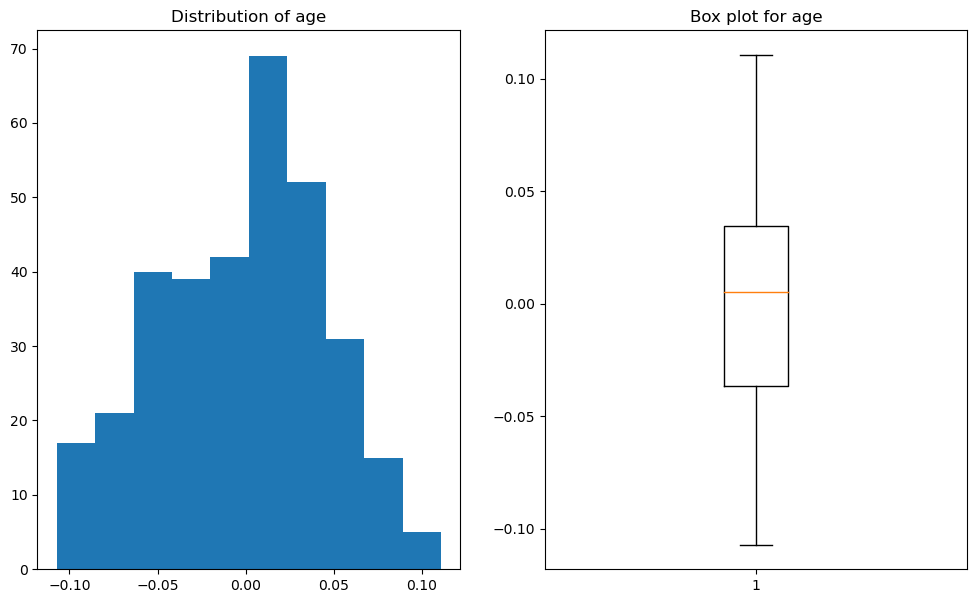

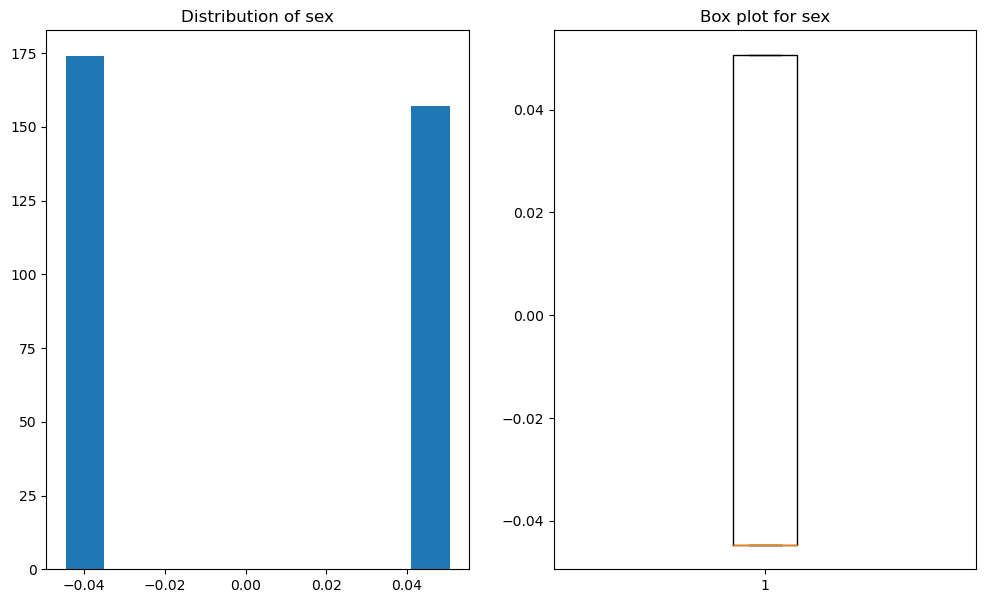

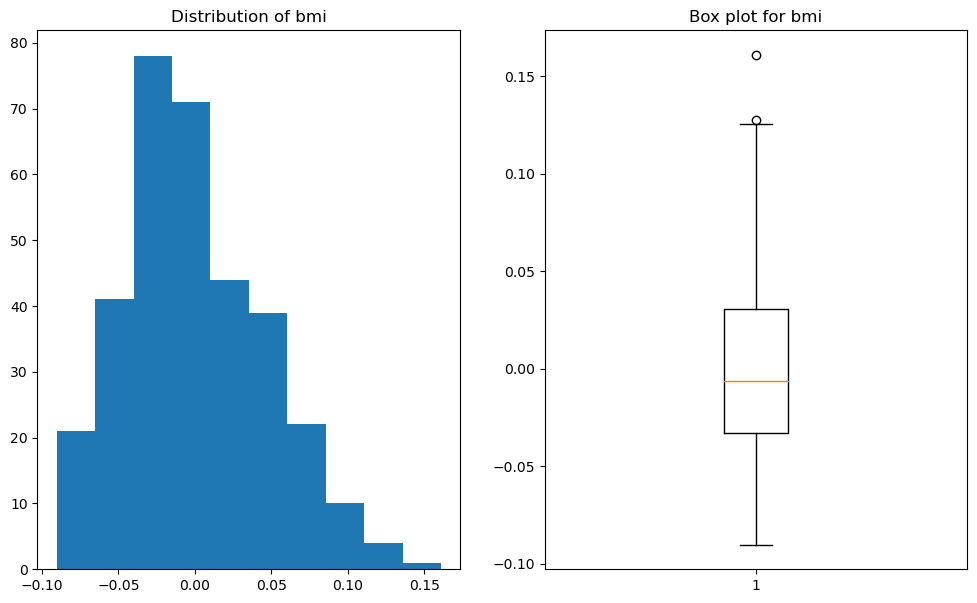

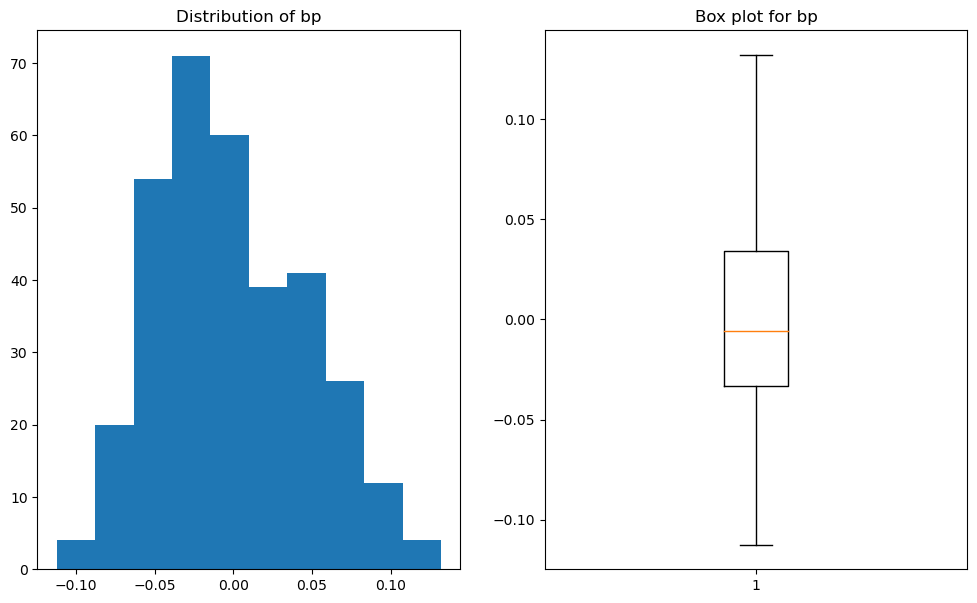

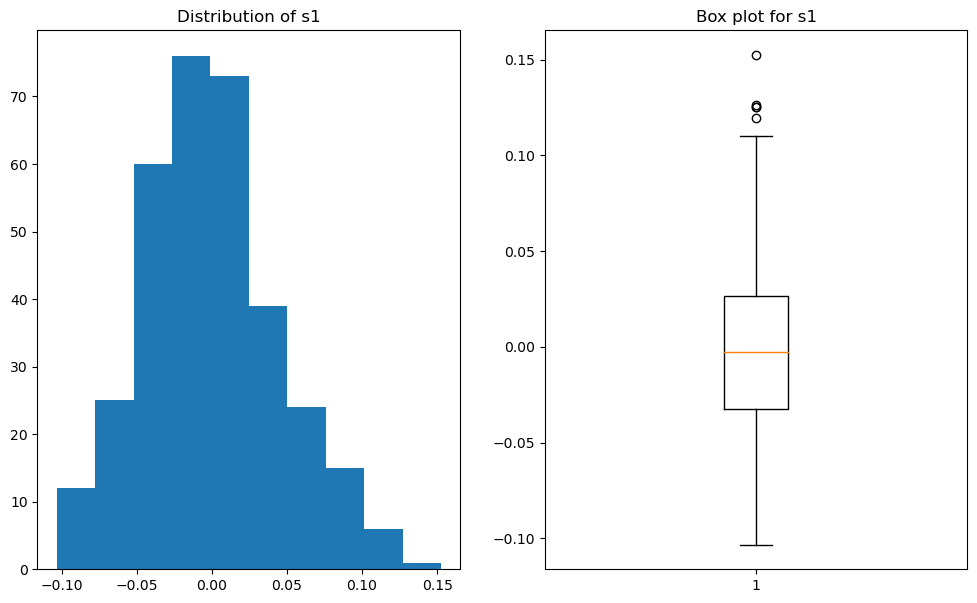

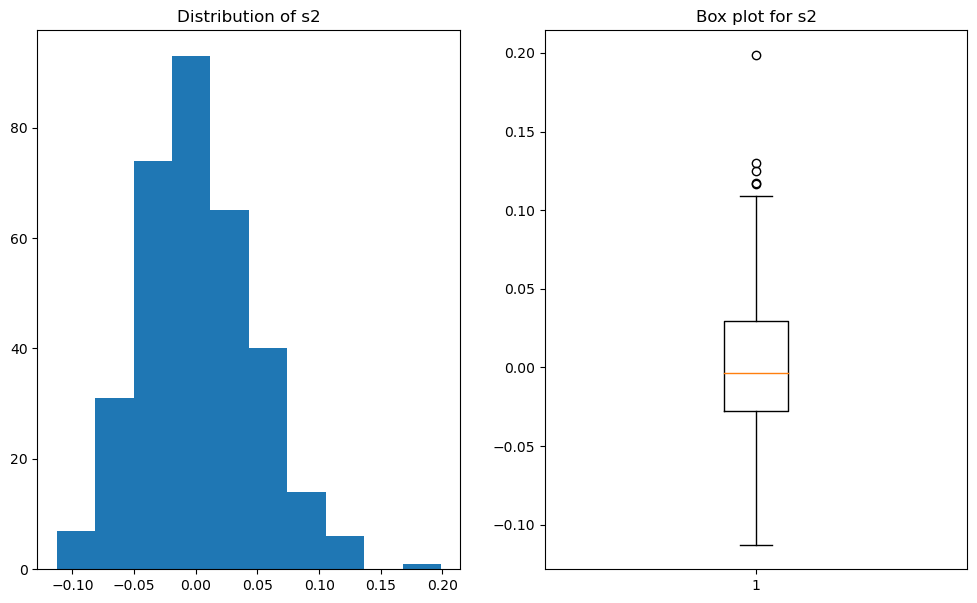

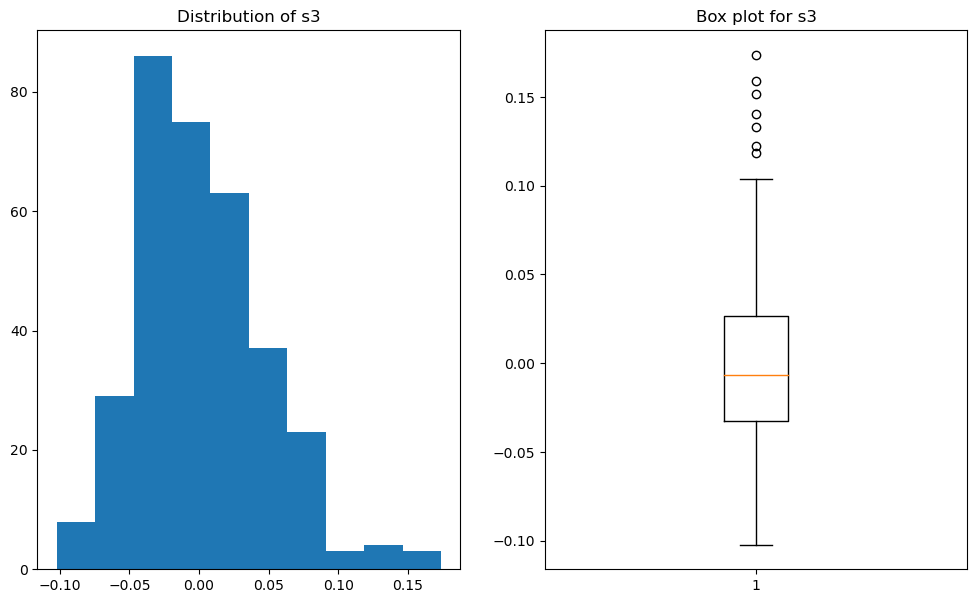

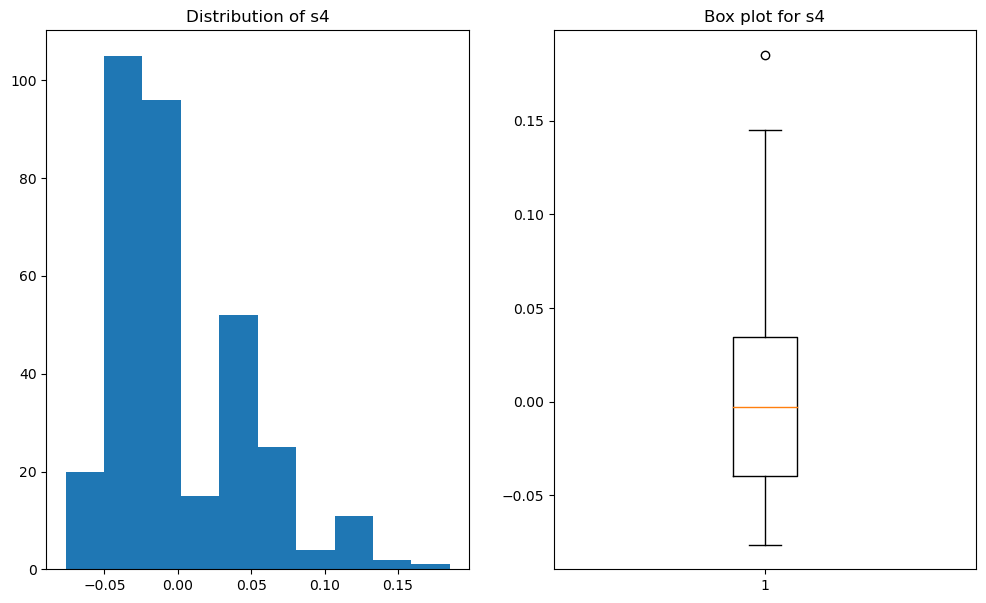

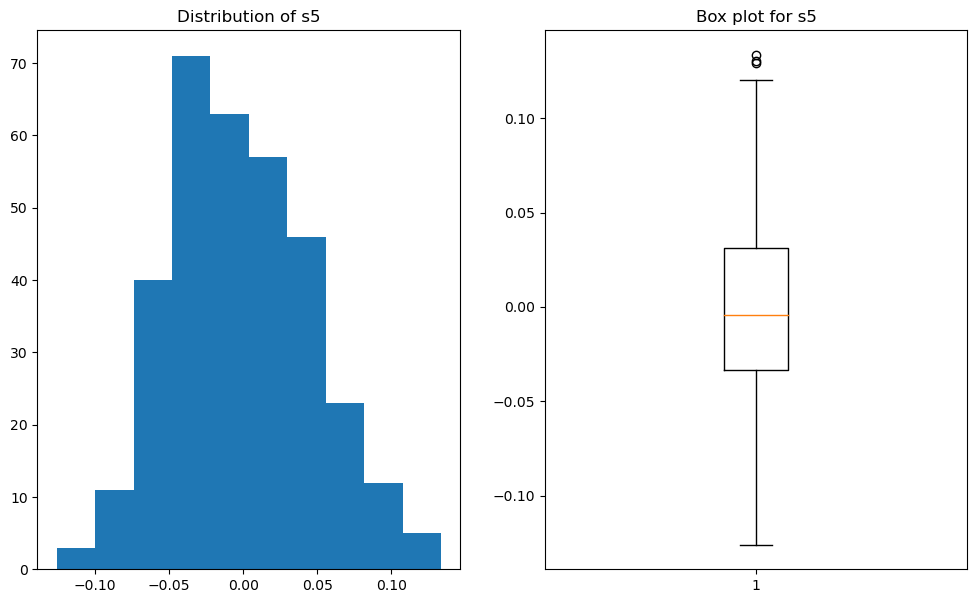

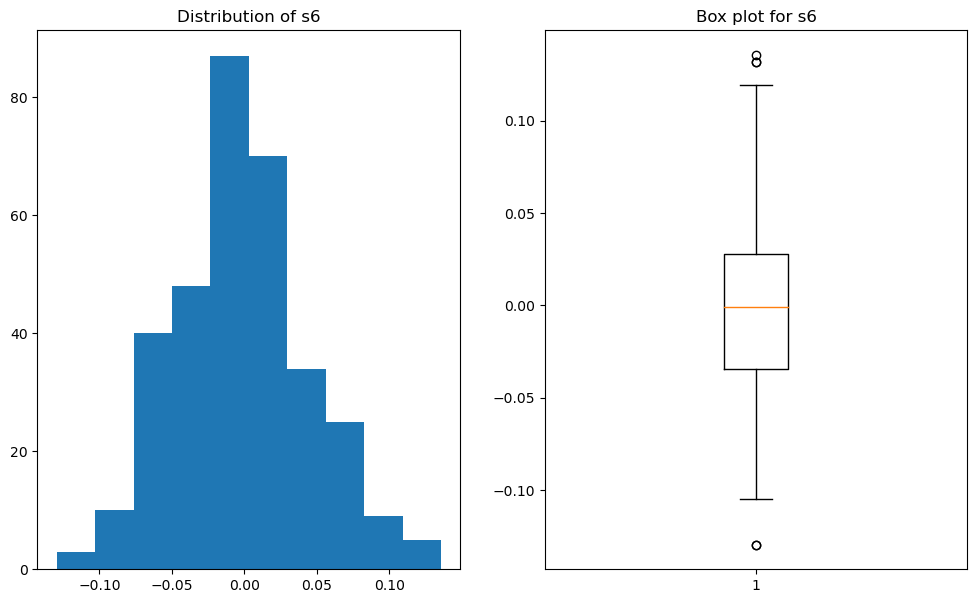

In [ ]:
for col in diabetes.feature_names:
    plt.figure(figsize = (12,7))
    plt.subplot(1,2,1)
    plt.hist(temp_data[col])
    plt.title("Distribution of "+col)
    plt.subplot(1,2,2)
    plt.boxplot(temp_data[col])
    plt.title("Box plot for "+ col)

All the columns are scaled, but the distribution is not uniform. For now proceeding without any data transformation.

### Training using MLP Regressor

About MLPRegressor:

class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [ ]:
model_1 = MLPRegressor(hidden_layer_sizes = [50,50],
                       activation = 'relu',
                       solver = 'adam',
                       learning_rate_init = 0.001,
                       verbose = True,
                       validation_fraction = 0.1,
                       random_state = 42 )

In [ ]:
model_1.fit(X_train, y_train)

Iteration 1, loss = 14104.36839917
Iteration 2, loss = 14093.12041241
Iteration 3, loss = 14081.96587657
Iteration 4, loss = 14071.13693135
Iteration 5, loss = 14060.01435666
Iteration 6, loss = 14048.80722769
Iteration 7, loss = 14037.75927742
Iteration 8, loss = 14026.41533091
Iteration 9, loss = 14014.87239685
Iteration 10, loss = 14003.12049862
Iteration 11, loss = 13991.15827458
Iteration 12, loss = 13979.14540053
Iteration 13, loss = 13967.07075947
Iteration 14, loss = 13954.57657069
Iteration 15, loss = 13941.91859203
Iteration 16, loss = 13929.49961433
Iteration 17, loss = 13916.59173668
Iteration 18, loss = 13904.02972546
Iteration 19, loss = 13890.91122224
Iteration 20, loss = 13877.36743237
Iteration 21, loss = 13863.78367532
Iteration 22, loss = 13849.45123678
Iteration 23, loss = 13835.03274509
Iteration 24, loss = 13819.50690580
Iteration 25, loss = 13803.90409488
Iteration 26, loss = 13787.33589634
Iteration 27, loss = 13770.09463237
Iteration 28, loss = 13752.55121393
I

/Users/jacindhas/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[50, 50], random_state=42, verbose=True)

In [ ]:
y_pred_1 = model_1.predict(X_test)
rmse_1 = mean_squared_error(y_test, y_pred_1, squared=False)
print(f"Mean Squared error for Model 1: {rmse_1}")

Mean Squared error for Model 1: 61.71608299496176


Let's increase the number of layers to 3...

In [ ]:
model_2 = MLPRegressor(hidden_layer_sizes=[50,50,50],
                        random_state = 42,
                       activation = 'relu',
                       solver = 'adam',
                       learning_rate_init = 0.001,
                       validation_fraction = 0.1)

model_2.fit(X_train, y_train)

/Users/jacindhas/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

In [ ]:
y_pred_2 = model_2.predict(X_test)
rmse_2 = mean_squared_error(y_test, y_pred_2, squared = False)
print(f"Mean Squared error for Model 2: {rmse_2}")

Mean Squared error for Model 2: 56.65271622660375


It got reduces a little bit, changing the learning rate to 0.01 and increasing the neurons at 100 for all the layers.

In [ ]:
model_3 = MLPRegressor(hidden_layer_sizes = [100,1001,100],
                      random_state = 42,
                      activation = 'relu',
                      solver = 'adam',
                      learning_rate_init = 0.01,
                      validation_fraction = 0.1,
                      verbose = True)
model_3.fit(X_train, y_train)

Iteration 1, loss = 13986.56989034
Iteration 2, loss = 12635.51475600
Iteration 3, loss = 9392.06111779
Iteration 4, loss = 4712.88121579
Iteration 5, loss = 3259.67800788
Iteration 6, loss = 4931.47239588
Iteration 7, loss = 2753.30249685
Iteration 8, loss = 2446.33788100
Iteration 9, loss = 3070.31609922
Iteration 10, loss = 3107.50623257
Iteration 11, loss = 2505.59969573
Iteration 12, loss = 1927.79247455
Iteration 13, loss = 2113.35622143
Iteration 14, loss = 2299.16421477
Iteration 15, loss = 1956.03734061
Iteration 16, loss = 1740.42440290
Iteration 17, loss = 1839.05935082
Iteration 18, loss = 1854.84626238
Iteration 19, loss = 1709.54916793
Iteration 20, loss = 1620.64401676
Iteration 21, loss = 1686.53773486
Iteration 22, loss = 1629.69554014
Iteration 23, loss = 1544.19027567
Iteration 24, loss = 1563.53327641
Iteration 25, loss = 1588.35552299
Iteration 26, loss = 1541.97135087
Iteration 27, loss = 1508.02694315
Iteration 28, loss = 1534.37333349
Iteration 29, loss = 1544.3

/Users/jacindhas/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[100, 1001, 100], learning_rate_init=0.01,
             random_state=42, verbose=True)

In [ ]:
y_pred_3 = model_3.predict(X_test)
rmse_3 = mean_squared_error(y_test, y_pred_3, squared = False)
print(f"Mean Squared error for Model 3: {rmse_3}")

Mean Squared error for Model 3: 51.915857662848076


In [ ]:
model_3.score(X_test, y_test)

0.5569964810342336

Return the coefficient of determination of the prediction.

The coefficient of determination is defined as the residual sum of squares ((y_true - y_pred)** 2).sum() and  is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

In [ ]:
score_1 = model_1.score(X_test, y_test)
score_2 = model_2.score(X_test, y_test)
score_3 = model_3.score(X_test, y_test)

score_pd = pd.DataFrame([[score_1, score_2, score_3]],
                        columns=['Model 1', 'Model 2', 'Model 3'])
score_pd

,Model 1,Model 2,Model 3
0,0.373957,0.472468,0.556996


it has increased which is good

## Classification

Trying the Iris Dataset ...

In [18]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for dataset
from sklearn.datasets import load_iris

# to split to train and test
from sklearn.model_selection import train_test_split

# for MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()

In [3]:
print(f"Number of records in the data: {len(iris.data)}")
print(f"Number of records in the target: {len(iris.target)}")
print(f"Features: {iris.feature_names} ")
print(f"Labels in the target: {iris.target_names}")

Number of records in the data: 150
Number of records in the target: 150
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
Labels in the target: ['setosa' 'versicolor' 'virginica']


### Splitting into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25,
                                                    random_state = 42)

print(f"Number of training set sample: ({len(X_train), len(y_train)})")
print(f"Number of testing set sample: ({len(X_test), len(y_test)})")

Number of training set sample: ((112, 112))
Number of testing set sample: ((38, 38))


### Visualize the data

In [9]:
temp_data = pd.DataFrame(X_train, columns = iris.feature_names)
temp_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.6,1.4,0.2
1,5.2,4.1,1.5,0.1
2,5.8,2.7,5.1,1.9
3,6.0,3.4,4.5,1.6
4,6.7,3.1,4.7,1.5


In [10]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  112 non-null    float64
 1   sepal width (cm)   112 non-null    float64
 2   petal length (cm)  112 non-null    float64
 3   petal width (cm)   112 non-null    float64
dtypes: float64(4)
memory usage: 3.6 KB


There is no null values in the data.

In [11]:
temp_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.040179,3.807143,1.214286
std,0.819123,0.437120,1.735310,0.747953
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


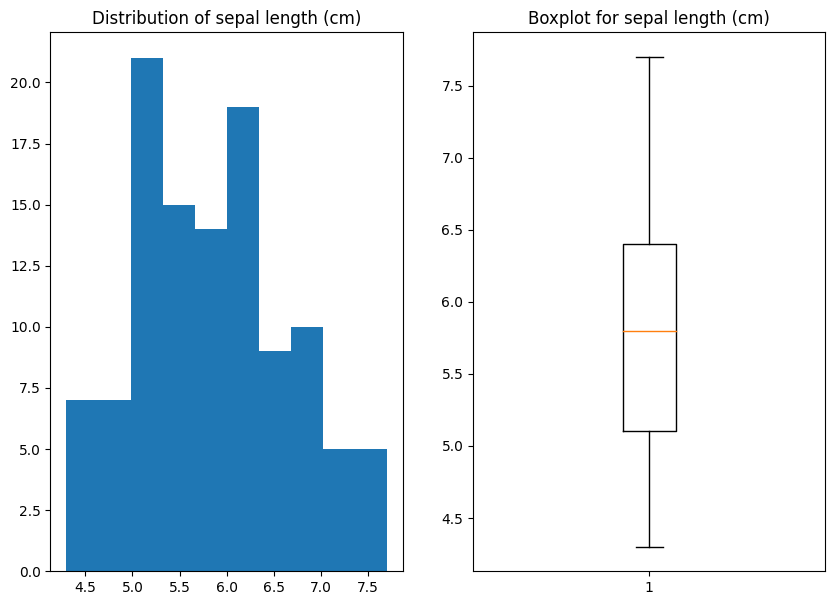

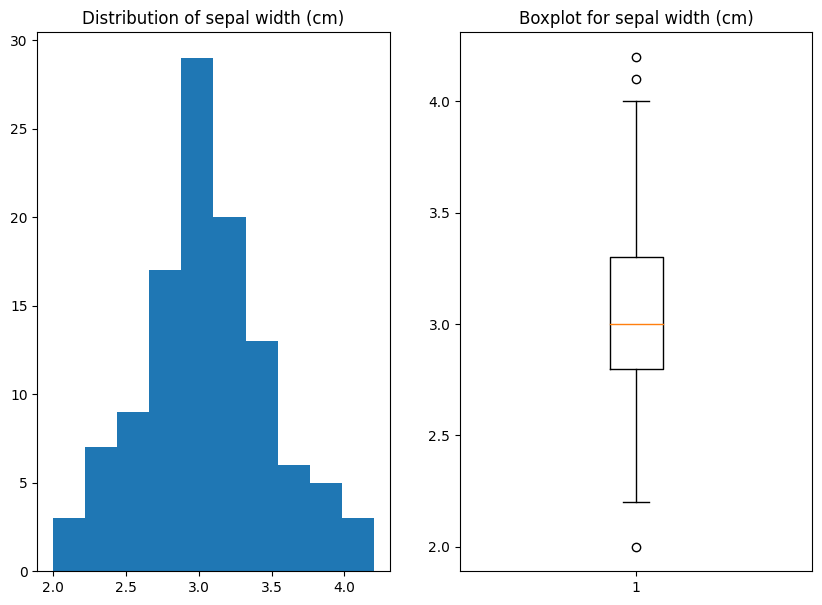

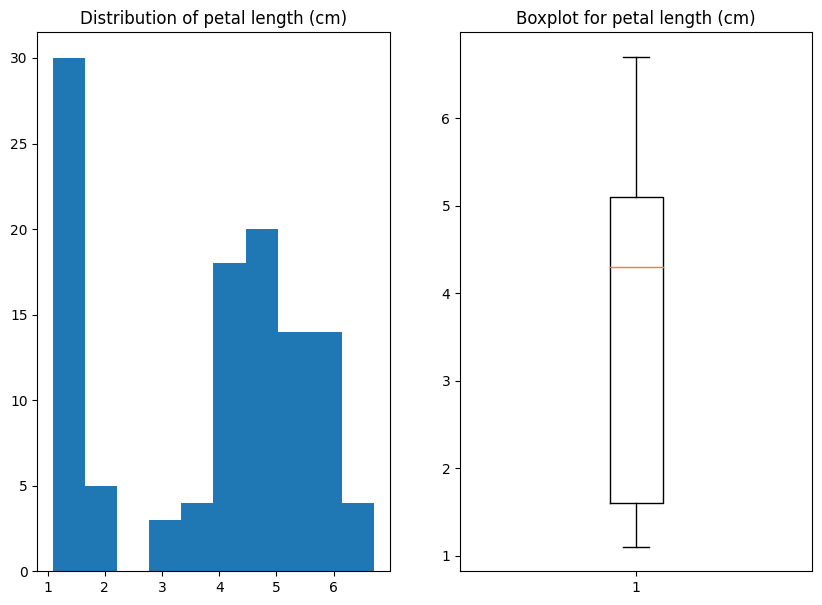

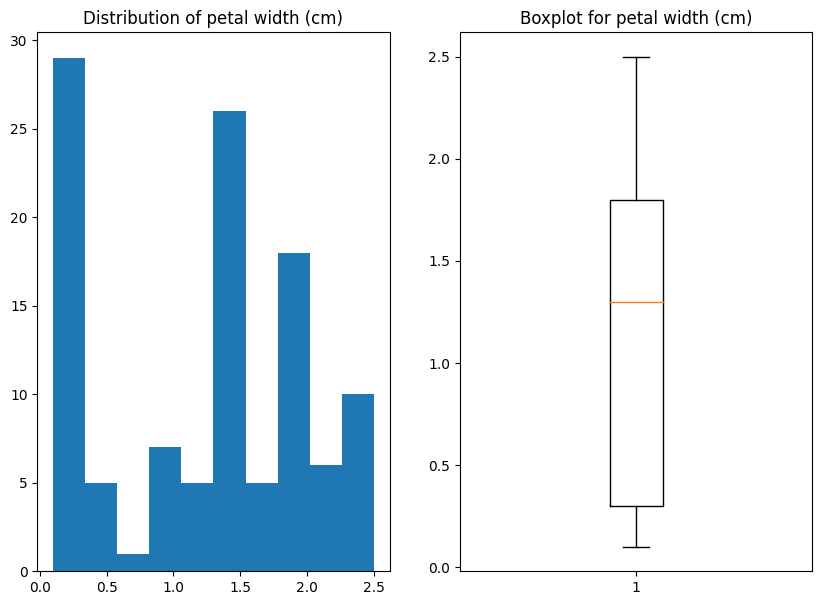

In [13]:
for item in iris.feature_names:
  plt.figure(figsize = (10,7))
  plt.subplot(1,2,1)
  plt.hist(temp_data[item])
  plt.title("Distribution of " + item)
  plt.subplot(1,2,2)
  plt.boxplot(temp_data[item])
  plt.title("Boxplot for " + item)

### Training using MLP Classifier

class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [16]:
model_1 = MLPClassifier(hidden_layer_sizes = [50,50], activation = "relu",
                        random_state = 42, learning_rate_init = 0.001,
                        verbose = True, solver = "adam",
                        validation_fraction= 0.1)

In [17]:
model_1.fit(X_train, y_train)

Iteration 1, loss = 1.28517693
Iteration 2, loss = 1.24393161
Iteration 3, loss = 1.20658263
Iteration 4, loss = 1.17295882
Iteration 5, loss = 1.14217376
Iteration 6, loss = 1.11379952
Iteration 7, loss = 1.08893255
Iteration 8, loss = 1.06726376
Iteration 9, loss = 1.04753810
Iteration 10, loss = 1.02924999
Iteration 11, loss = 1.01193844
Iteration 12, loss = 0.99532828
Iteration 13, loss = 0.97925028
Iteration 14, loss = 0.96357903
Iteration 15, loss = 0.94810493
Iteration 16, loss = 0.93277717
Iteration 17, loss = 0.91751020
Iteration 18, loss = 0.90243845
Iteration 19, loss = 0.88762211
Iteration 20, loss = 0.87309914
Iteration 21, loss = 0.85896711
Iteration 22, loss = 0.84513050
Iteration 23, loss = 0.83144757
Iteration 24, loss = 0.81789235
Iteration 25, loss = 0.80456723
Iteration 26, loss = 0.79134009
Iteration 27, loss = 0.77820263
Iteration 28, loss = 0.76519009
Iteration 29, loss = 0.75239321
Iteration 30, loss = 0.73972213
Iteration 31, loss = 0.72708837
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[50, 50], random_state=42, verbose=True)

In [19]:
y_pred_1 = model_1.predict(X_test)
acc_1 = accuracy_score(y_test, y_pred_1)

print(f"Accuracy for model 1: {acc_1}")

Accuracy for model 1: 1.0


Trying early stopping ...

In [20]:
model_2 = MLPClassifier(hidden_layer_sizes = [50,50], random_state = 42,
                        verbose = True, early_stopping = True,
                        activation = "relu",
                        learning_rate_init = 0.001,
                        solver = "adam",
                        validation_fraction= 0.1)

In [21]:
model_2.fit(X_train, y_train)

Iteration 1, loss = 1.28586105
Validation score: 0.333333
Iteration 2, loss = 1.24440395
Validation score: 0.333333
Iteration 3, loss = 1.20674165
Validation score: 0.333333
Iteration 4, loss = 1.17287863
Validation score: 0.333333
Iteration 5, loss = 1.14208463
Validation score: 0.416667
Iteration 6, loss = 1.11370010
Validation score: 0.500000
Iteration 7, loss = 1.08868598
Validation score: 0.583333
Iteration 8, loss = 1.06687502
Validation score: 0.583333
Iteration 9, loss = 1.04706056
Validation score: 0.666667
Iteration 10, loss = 1.02880605
Validation score: 0.666667
Iteration 11, loss = 1.01159293
Validation score: 0.666667
Iteration 12, loss = 0.99505718
Validation score: 0.666667
Iteration 13, loss = 0.97902479
Validation score: 0.666667
Iteration 14, loss = 0.96338809
Validation score: 0.666667
Iteration 15, loss = 0.94798320
Validation score: 0.833333
Iteration 16, loss = 0.93276938
Validation score: 0.916667
Iteration 17, loss = 0.91765080
Validation score: 0.916667
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=[50, 50], random_state=42,
              verbose=True)

In [22]:
y_pred_2 = model_2.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred_2)

print(f"Accuracy for model 2: {acc_2}")

Accuracy for model 2: 0.8421052631578947


Its lesser than model 1

In [23]:
score_1 = model_1.score(X_test, y_test)
score_2 = model_2.score(X_test, y_test)

In [24]:
score = pd.DataFrame([[score_1, score_2]], columns = ['Model 1', 'Model 2'])
score

,Model 1,Model 2
0,1.0,0.842105
